# <font color='blue'>REGRESSÃO LINEAR SIMPLES</font>

Um psicólogo está investigando a relação entre o tempo que um indivíduo leva para reagir a um estímulo visual (Y) e as características:sexo (X1), idade (X2) e acuidade visual (X3, medida em porcentagem). Essas variáveis (informações ou características) foram observadas em uma amostra de n = 20 indivíduos
e o conjunto de dados mais adiante.(Exemplo do livro de Bussab e Morettin, 2017). 

In [8]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore") # Para suprimir os avisos; não poluir
%matplotlib inline  

In [9]:
# Carregando os dados
dados = pd.read_csv('dados_psicologo.csv')
dados.head()

,Indiv,Y,X1,X2,X3
0,1,96,H,20,90
1,2,92,M,20,100
2,3,106,H,20,80
3,4,100,M,20,90
4,5,98,M,25,100


In [10]:
# Shape dos dados de treino
dados.shape

(20, 5)

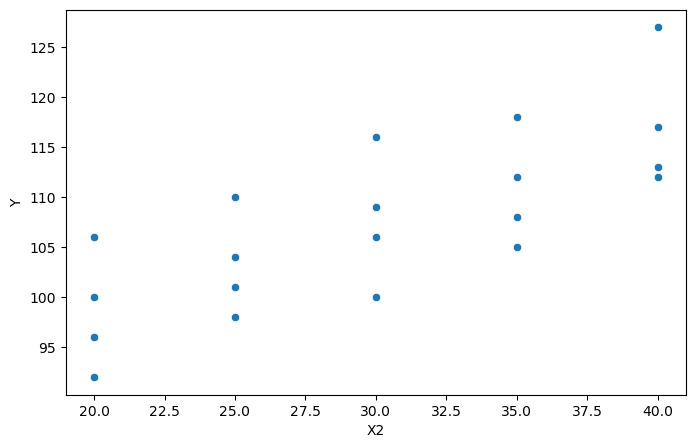

In [11]:
# scatterplot (gráfico de dispersão)
import seaborn as sns
ax = sns.scatterplot(x='X2', y='Y', data=dados)

In [12]:
Grafico = {"Y":dados["Y"], "X2":dados["X2"], "X3":dados["X3"]} # Dicionário
Grafico = pd.DataFrame(Grafico)
Grafico.head(2)

,Y,X2,X3
0,96,20,90
1,92,20,100


array([[<AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'X2'}>],
       [<AxesSubplot:title={'center':'X3'}>, <AxesSubplot:>]],
      dtype=object)

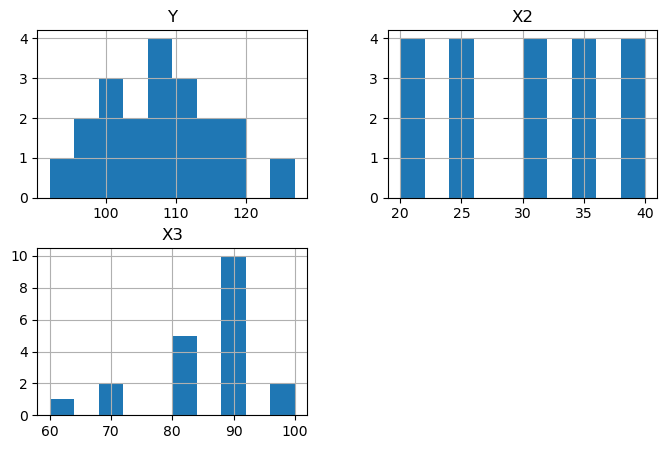

In [13]:
plt.rcParams['figure.figsize'] = (8.0, 5.0)
Grafico.hist()

In [14]:
# Calculando a média da variável de resposta
valor_medio_esperado_na_previsao = dados["Y"].mean()
valor_medio_esperado_na_previsao

107.5

In [15]:
# Calculando (simulando) o SSE - Sum of Squared Errors
squared_errors = pd.Series(valor_medio_esperado_na_previsao - dados["Y"])**2 
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 1373


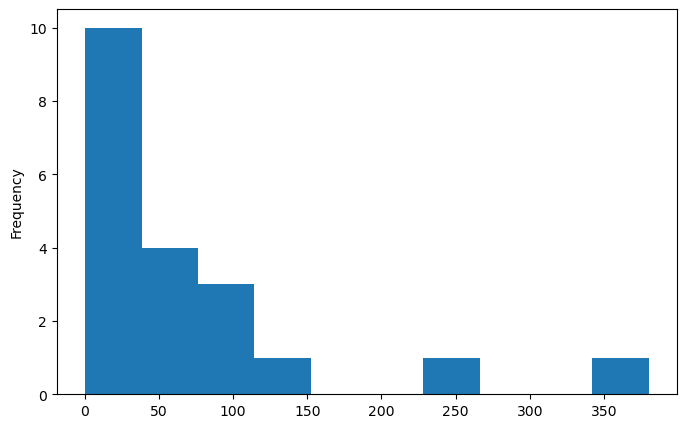

In [16]:
# Histograma dos erros
# Temos mais erros "pequenos", ou seja, mais valores próximos à média.
hist_plot = squared_errors.plot(kind='hist')

## Regressão Linear com o StatsModels

In [17]:
# Importando as funções
import statsmodels.api as sm

In [18]:
# Gerando X e Y. 
Y = dados['Y']
X2 = dados['X2']

In [19]:
# o statmodels requer a adicão de constante coefientes à variável realizar o treinamento
X2 = sm.add_constant(X2)
X2.head()

,const,X2
0,1.0,20
1,1.0,20
2,1.0,20
3,1.0,20
4,1.0,25


In [20]:
# Criando o modelo de regressão
modlin = sm.OLS(Y, X2) 

# Treinando o modelo
modlin_v1 = modlin.fit()

print(modlin_v1.params)

const    80.5
X2        0.9
dtype: float64


Então o modelo de regressão modlin_v1 é: y_hat = 80.5 + 0.9*x2

In [21]:
# Imprimir o relatório
print(modlin_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     25.90
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           7.66e-05
Time:                        21:22:53   Log-Likelihood:                -61.754
No. Observations:                  20   AIC:                             127.5
Df Residuals:                      18   BIC:                             129.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.5000      5.451     14.768      0.0

In [22]:
# Fazendo previsão qualquer com o modelo treinado
x2 = 26            
Xp = np.array([1, x2]) 

mensagem = "Se x2 = %01.f, o modelo prevê que Y é %0.2f."
print(mensagem % (x2, modlin_v1.predict(Xp)))

Se x2 = 26, o modelo prevê que Y é 103.90.


In [23]:
# Gerando os valores previstos
valores_previstos = modlin_v1.predict(X2)
valores_previstos

0      98.5
1      98.5
2      98.5
3      98.5
4     103.0
5     103.0
6     103.0
7     103.0
8     107.5
9     107.5
10    107.5
11    107.5
12    112.0
13    112.0
14    112.0
15    112.0
16    116.5
17    116.5
18    116.5
19    116.5
dtype: float64

##### Gerando um ScatterPlot com a Linha de Regressão

In [24]:
# Range de valores para x e y
X2_range = [dados['X2'].min(), dados['X2'].max()]   # lista
print('X2_range:', X2_range)

Y_range = [dados['Y'].min(), dados['Y'].max()]   # lista
Y_range
print('Y_range:', Y_range)

X2_range: [20, 40]
Y_range: [92, 127]


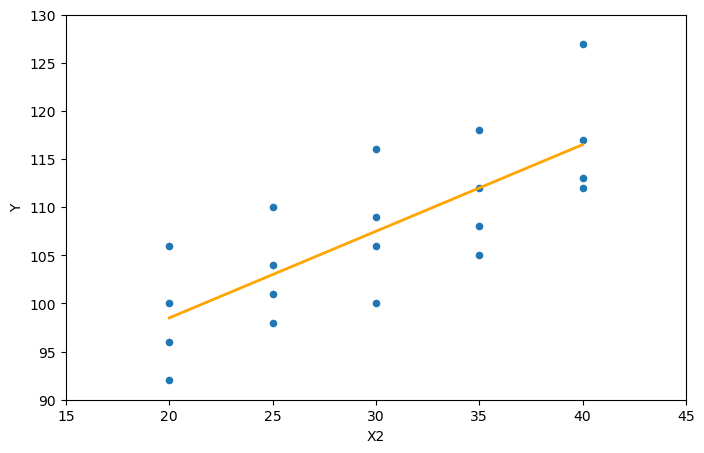

In [25]:
# Primeira camada do Scatter Plot
scatter_plot = dados.plot(kind = 'scatter', x = 'X2', y = 'Y', xlim = [15, 45], ylim = [90, 130])

# Segunda camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(dados['X2'], valores_previstos, '-', color = 'orange', linewidth = 2)

In [26]:
# Padronizar os dados
def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

# Gerando os resíduos
residuos = dados['Y'] - valores_previstos

# Normalizar os resíduos
residuos_normalizados = standardize(residuos)

In [27]:
# Desvio padrão = ~1 (pois foi padranizado)
print('Desvio-padrão_residuos_normalizados: {:0.3f}'.format(residuos_normalizados.std()))

# Média = ~0 (pois foi padranizado)
print('Média_residuos_normalizados        : {:0.3f}'.format(residuos_normalizados.mean()))

Desvio-padrão_residuos_normalizados: 1.026
Média_residuos_normalizados        : 0.000


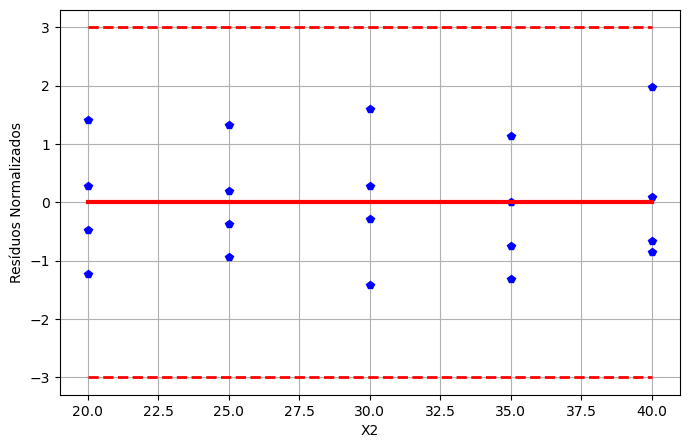

In [28]:
# ScatterPlot dos resíduos
residual_scatter_plot = plt.plot(dados['X2'], residuos_normalizados,'bp')
plt.xlabel('X2') 
plt.ylabel('Resíduos Normalizados') 
mean_residual = plt.plot([int(X2_range[0]),round(X2_range[1],0)], [0,0], '-', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(X2_range[0]),round(X2_range[1],0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(X2_range[0]),round(X2_range[1],0)], [-3,-3], '--', color = 'red', linewidth = 2)
plt.grid()

In [29]:
# Vamos criar "nossa" função para comparar com "Numpy" e "função pearsonr do SciPy"

### DESVIO-PADRÃO

def calc_desvio_padrao(variable, bias = 0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations - min(bias, 1)))

print('***** DESVIO-PADRÃO *****')
print ('Resultado da Função: %0.5f' % (calc_desvio_padrao(dados['X2'])))
print ('Resultado do Numpy : %0.5f' % (np.std(dados['X2'])))

### CORRELAÇÃO

# Funções para calcular a variância da variável X2 e a correlação com a variável target
def covariance(variable_1, variable_2, bias = 0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations - min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1, var2, bias = 0):
    return covariance(standardize(var1), standardize(var2), bias)

# Compara o resultado das nossas funções com a função pearsonr do SciPy
from scipy.stats.stats import pearsonr
print('\n***** CORRELAÇÃO *****')
print ('Nossa estimativa de Correlação     : %0.5f' % (correlation(dados['X2'], dados['Y'])))
print ('Correlação função pearsonr do SciPy: %0.5f' % pearsonr(dados['X2'], dados['Y'])[0])

***** DESVIO-PADRÃO *****
Resultado da Função: 7.07107
Resultado do Numpy : 7.07107

***** CORRELAÇÃO *****
Nossa estimativa de Correlação     : 0.76808
Correlação função pearsonr do SciPy: 0.76808
